In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import numpy as np
import pandas as pd
import math

In [3]:
df =pd.read_csv("/gdrive/Shareddrives/FYP Project/Dataset/FoodData_modified.csv")

In [4]:
df

,Name,Group,Glycemic index,Insulin index,Serving Size,Acidity (Based on PRAL),GI Category,Calories (kcal),Net Carbs ( grams),Protein (g),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
0,"Bread, wheat, toasted",baked-products,60.0,100,1 oz (28.35 grams),4.9 (acidic),medium,313,51.07,12.96,...,0.32,0.31,0.15,0.0,0.99,1.02,1.72,NaN,NaN,NaN
1,"Biscuits, plain or buttermilk, prepared from r...",baked-products,44.0,48,1 oz (28.35 grams),3.4 (acidic),low,353,43.10,7.00,...,0.35,0.31,0.16,3.0,4.32,6.93,4.16,NaN,NaN,NaN
2,"Bread, french or vienna (includes sourdough)",baked-products,70.0,NaN,1 oz (28.35 grams),5.2 (acidic),medium,272,49.68,10.75,...,NaN,NaN,NaN,0.0,0.53,0.36,0.86,44.23,0.51,0.01
3,"Cake, chocolate, prepared from recipe without ...",baked-products,41.0,82,"1 piece (1/12 of 9"" dia) (95 grams)",2 (acidic),low,371,51.80,5.30,...,0.27,0.28,0.12,58.0,5.43,6.04,2.76,NaN,NaN,NaN
4,"Cake, fruitcake, commercially prepared",baked-products,53.0,NaN,1 piece (43 grams),-0.7 (alkaline),low,324,57.90,2.90,...,0.14,0.14,0.07,5.0,1.05,4.20,3.32,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,"Cabbage, napa, cooked",vegetables,32.0,NaN,1 cup (109 grams),-1.2 (alkaline),low,12,2.23,1.10,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00
622,"Grape leaves, raw",vegetables,NaN,NaN,1 leaf (3 grams),-6.8 (alkaline),NaN,93,6.31,5.60,...,NaN,NaN,NaN,0.0,0.34,0.08,1.07,NaN,NaN,0.00
623,"Peppers, ancho, dried",vegetables,NaN,NaN,1 pepper (17 grams),-41.1 (alkaline),NaN,281,29.82,11.86,...,0.36,0.49,0.23,0.0,0.82,0.49,4.51,NaN,NaN,0.00
624,"Epazote, raw",vegetables,NaN,NaN,1 tbsp (0.8 grams),-16.7 (alkaline),NaN,32,3.64,0.33,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00


In [5]:
df.describe()

,Glycemic index,Calories (kcal),Net Carbs ( grams),Protein (g),Fats (g),Carbs (g),Net carbs (g),Sugar (g),Fiber (g),Calcium (mg),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
count,550.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,485.000000,581.000000,621.000000,...,427.000000,428.000000,426.000000,601.000000,597.000000,590.000000,590.000000,112.000000,184.000000,343.000000
mean,35.363636,216.998403,19.527412,8.220064,10.756198,22.770831,19.541757,9.053361,3.479174,107.190016,...,0.457611,0.521425,0.994038,30.079867,3.570285,4.307458,2.804780,12.125000,2.168859,0.124927
std,25.224070,188.224764,23.340832,9.186056,18.993655,25.012394,23.333177,16.763168,7.061645,308.883300,...,0.442380,0.511791,10.456163,87.005710,7.407209,9.187711,9.073928,18.773504,6.001451,0.863885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,60.250000,2.532500,1.202500,0.300000,3.592500,2.532500,0.420000,0.000000,12.000000,...,0.080000,0.090000,0.040000,0.000000,0.050000,0.050000,0.090000,0.000000,0.040000,0.000000
50%,33.000000,165.500000,9.360000,4.145000,2.005000,13.050000,9.375000,2.500000,1.500000,30.000000,...,0.320000,0.320000,0.160000,0.000000,0.600000,0.595000,0.450000,1.745000,0.490000,0.000000
75%,54.000000,327.000000,28.497500,13.370000,13.887500,33.457500,28.497500,8.550000,3.300000,91.000000,...,0.750000,0.892500,0.460000,30.000000,3.680000,4.840000,1.922500,16.417500,1.565000,0.000000
max,104.000000,902.000000,99.980000,75.160000,100.000000,99.980000,99.980000,99.800000,70.100000,5876.000000,...,2.350000,2.310000,153.000000,1085.000000,82.480000,72.960000,153.000000,73.300000,55.600000,14.890000


In [6]:
df.columns

Index(['Name', 'Group', 'Glycemic index', 'Insulin index', 'Serving Size',
       'Acidity (Based on PRAL)', 'GI Category', 'Calories (kcal)',
       'Net Carbs ( grams)', 'Protein (g)', 'Fats (g)', 'Carbs (g)',
       'Net carbs (g)', 'Sugar (g)', 'Fiber (g)', 'Calcium (mg)', 'Iron (mg)',
       'Magnesium (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Sodium (mg)',
       'Zinc (mg)', 'Copper (mg)', 'Vitamin A (IU)', 'Vitamin E (mg)',
       'Vitamin D (µg)', 'Vitamin C (mg)', 'Vitamin B1 (mg)',
       'Vitamin B2 (mg)', 'Vitamin B3 (mg)', 'Vitamin B5 (mg)',
       'Vitamin B6 (mg)', 'Folate (µg)', 'Vitamin B12 (µg)', 'Vitamin K (µg)',
       'Tryptophan (mg)', 'Threonine (mg)', 'Isoleucine (mg)', 'Leucine (mg)',
       'Lysine (mg)', 'Methionine (mg)', 'Phenylalanine (mg)', 'Valine (mg)',
       'Histidine (mg)', 'Cholesterol (mg)', 'Saturated Fat (g)',
       'Monounsaturated Fat (g)', 'Polyunsaturated fat (g)', 'Starch (g)',
       'Fructose (g)', 'Trans Fat (g)'],
      dtype='obje

In [7]:
df.dropna(subset = ['Glycemic index'], inplace=True)

In [8]:
dataset = df.fillna(0)

In [9]:
dataset['GI Category'] = dataset['GI Category'].map({'low':0, 'medium':1, 'high':2})

In [10]:
train_columns = ["Calories (kcal)", 'Protein (g)','Fats (g)', 'Carbs (g)', 'Fiber (g)', 'Sugar (g)','Phosphorus (mg)', 'Potassium (mg)', 'Sodium (mg)', 'Saturated Fat (g)', 'Trans Fat (g)', 'GI Category']

In [11]:
data = dataset[train_columns]

In [12]:
data

,Calories (kcal),Protein (g),Fats (g),Carbs (g),Fiber (g),Sugar (g),Phosphorus (mg),Potassium (mg),Sodium (mg),Saturated Fat (g),Trans Fat (g),GI Category
0,313,12.96,4.27,55.77,4.7,6.42,188.0,223.0,601.0,0.99,0.00,1
1,353,7.00,16.30,44.60,1.5,2.18,164.0,121.0,580.0,4.32,0.00,0
2,272,10.75,2.42,51.88,2.2,4.62,105.0,117.0,602.0,0.53,0.01,1
3,371,5.30,15.10,53.40,1.6,0.00,106.0,140.0,315.0,5.43,0.00,0
4,324,2.90,9.10,61.60,3.7,27.42,52.0,153.0,101.0,1.05,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
617,17,0.85,0.29,3.53,0.4,2.58,19.0,217.0,10.0,0.02,0.00,0
618,23,1.10,0.30,5.10,1.9,2.71,17.0,158.0,14.0,0.05,0.00,0
620,22,1.14,0.72,3.81,2.5,0.84,41.0,261.0,7.0,0.11,0.00,0
621,12,1.10,0.17,2.23,0.0,0.00,19.0,87.0,11.0,0.00,0.00,0


In [13]:
data['GI Category'].value_counts()

0    418
1     95
2     37
Name: GI Category, dtype: int64

In [14]:
# separating the data and labels
X = data.drop(columns = 'GI Category', axis=1)  # axis = 1 (specify column)
Y = data['GI Category']

In [15]:
print(X)  

     Calories (kcal)  Protein (g)  Fats (g)  Carbs (g)  Fiber (g)  Sugar (g)  \
0                313        12.96      4.27      55.77        4.7       6.42   
1                353         7.00     16.30      44.60        1.5       2.18   
2                272        10.75      2.42      51.88        2.2       4.62   
3                371         5.30     15.10      53.40        1.6       0.00   
4                324         2.90      9.10      61.60        3.7      27.42   
..               ...          ...       ...        ...        ...        ...   
617               17         0.85      0.29       3.53        0.4       2.58   
618               23         1.10      0.30       5.10        1.9       2.71   
620               22         1.14      0.72       3.81        2.5       0.84   
621               12         1.10      0.17       2.23        0.0       0.00   
625              284         9.25      0.73      73.01       70.1       0.00   

     Phosphorus (mg)  Potassium (mg)  S

In [16]:
print(Y)

0      1
1      0
2      1
3      0
4      0
      ..
617    0
618    0
620    0
621    0
625    0
Name: GI Category, Length: 550, dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler

# get standard scalar  z = (x - u) / s  ; u = mean , s = standard deviation (range - to + value depend on data)
scaler = StandardScaler()   #Standardize features by removing the mean and scaling to unit variance

In [18]:
scaler.fit(X)  # Compute the mean and std to be used for later scaling.

StandardScaler()

In [19]:
standardized_data = scaler.transform(X)   # Perform standardization by centering and scaling

In [20]:
print(standardized_data)  # see standardized data

[[ 0.47682419  0.48855172 -0.35308521 ...  0.11214639 -0.34627843
  -0.10732219]
 [ 0.68706413 -0.15566812  0.26345183 ...  0.1019185   0.09076344
  -0.10732219]
 [ 0.26132825  0.24967155 -0.44789764 ...  0.11263343 -0.40665058
  -0.09253211]
 ...
 [-1.05267139 -0.78907891 -0.53502258 ... -0.17715681 -0.46177298
  -0.10732219]
 [-1.10523138 -0.79340253 -0.56321006 ... -0.17520864 -0.4762098
  -0.10732219]
 [ 0.32440023  0.08753568 -0.53451008 ... -0.16351962 -0.4762098
  -0.10732219]]


In [21]:
# take standardize data for further processing 
X = standardized_data                 
Y = data['GI Category']

In [22]:
print(X)
print(Y)

[[ 0.47682419  0.48855172 -0.35308521 ...  0.11214639 -0.34627843
  -0.10732219]
 [ 0.68706413 -0.15566812  0.26345183 ...  0.1019185   0.09076344
  -0.10732219]
 [ 0.26132825  0.24967155 -0.44789764 ...  0.11263343 -0.40665058
  -0.09253211]
 ...
 [-1.05267139 -0.78907891 -0.53502258 ... -0.17715681 -0.46177298
  -0.10732219]
 [-1.10523138 -0.79340253 -0.56321006 ... -0.17520864 -0.4762098
  -0.10732219]
 [ 0.32440023  0.08753568 -0.53451008 ... -0.16351962 -0.4762098
  -0.10732219]]
0      1
1      0
2      1
3      0
4      0
      ..
617    0
618    0
620    0
621    0
625    0
Name: GI Category, Length: 550, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split

# split ( make sure we split them roughly with equal patients and healthy into both sides )
# Test set size 20%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(550, 11) (440, 11) (110, 11)


Initial model using KNeighborsClassifier

In [25]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(7)

#training Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the training data :  0.8227272727272728
Accuracy score of the test data :  0.7909090909090909


Grid Search


                 model  best_score                                 best_params
0  logistic_regression    0.741818                                  {'C': 0.5}
1        random_forest    0.758182                        {'n_estimators': 10}
2            kNeighbor    0.770909  {'n_neighbors': 24, 'weights': 'distance'}


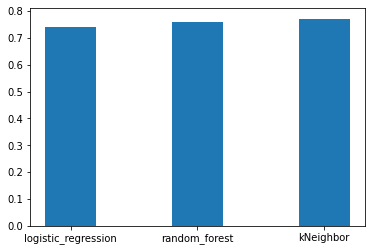

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , cross_val_score, GridSearchCV

# define kfold
K = 10

models = {
    "logistic_regression" : {
         "model": LogisticRegression(solver="liblinear"),
        "params":{
            "C":  [0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 10 , 20, 30 ]
        }
    },
    "random_forest" : {
         "model":RandomForestClassifier(),
        "params":{
            "n_estimators": [1, 5, 10]
        }
    },
    "kNeighbor": {
        "model":KNeighborsClassifier(),
        "params":{
            "n_neighbors": range(1,100),
            "weights": ["uniform", "distance"]
        }
    }
}


results = []
names = []

for name, model_param in models.items():

    # use Kfold
    kf =KFold(n_splits=K)
    # use cross validation
    search = GridSearchCV(estimator=model_param["model"], param_grid=model_param["params"], cv= kf,n_jobs=-1)
    search.fit(X, Y)
    results.append({
        "model": name,
        "best_score": search.best_score_,
        "best_params": search.best_params_
    })


#report

result_df = pd.DataFrame(results, columns=["model", "best_score", "best_params"])

print(result_df)
plt.bar(result_df["model"],result_df["best_score"], width=0.4)

plt.show()

Multi-Classifier

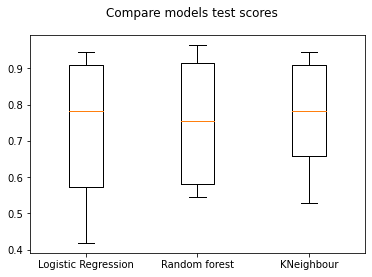

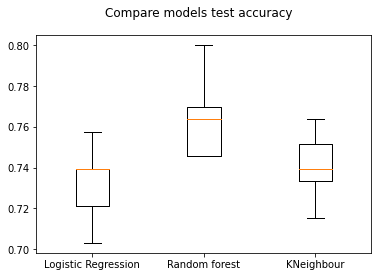

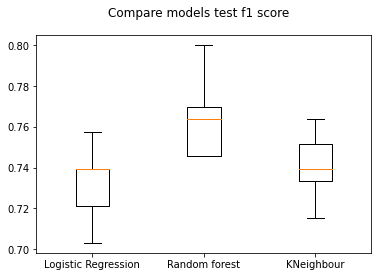

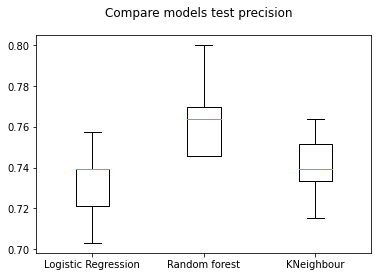

                  name  test_accuracy   test_f1  test_precision
0  Logistic Regression       0.732121  0.732121        0.732121
1        Random forest       0.764848  0.764848        0.764848
2           KNeighbour       0.740606  0.740606        0.740606


In [27]:
import  matplotlib.pyplot as plt
from matplotlib.pyplot import plot_date
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold ,StratifiedShuffleSplit, cross_val_score, cross_validate

def plot_boxplot(xlabels , yvalues,title):
    fig = plt.figure()
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    ax.boxplot(yvalues)
    ax.set_xticklabels(xlabels)
    plt.show()

# define kfold
K = 10

models = []
models.append(("Logistic Regression", LogisticRegression(solver="liblinear", C=0.5)))
models.append(("Random forest", RandomForestClassifier(n_estimators=10)))
models.append(("KNeighbour", KNeighborsClassifier(n_neighbors=24)))

results = []
names = []
total_df = []

acc_results = []
f1_results = []
precision_results = []

for name, model in models:

    # use Kfold
    kf = KFold(n_splits=K)
    kf2 = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # use cross validation
    score = cross_val_score(model, X, Y, scoring="accuracy", cv=kf)

    results.append(score)
    names.append(name)
    temp = cross_validate(model, X, Y, scoring=["accuracy","f1_micro","precision_micro"], cv=kf2)

    acc_results.append(temp["test_accuracy"])
    f1_results.append(temp["test_f1_micro"])
    precision_results.append(temp["test_precision_micro"])

    total_df.append(
            {
                "name":name,
                "test_accuracy" : temp["test_accuracy"].mean(),
                "test_f1": temp["test_f1_micro"].mean(),
                "test_precision" : temp["test_precision_micro"].mean(),
            }
    )

# report

plot_boxplot(names, results,"Compare models test scores")
plot_boxplot(names,acc_results, "Compare models test accuracy")
plot_boxplot(names,f1_results, "Compare models test f1 score")
plot_boxplot(names,precision_results, "Compare models test precision")

new_df = pd.DataFrame(total_df, columns=["name", "test_accuracy","test_f1","test_precision"])
print(new_df)

Final
